In [1]:
!pip install pymongo

In [2]:
import os
os.chdir("C:/Users/bhara/Desktop/603")

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymongo as pym
import matplotlib.pyplot as plt
from pymongo import MongoClient
from pandas.io.json import json_normalize
import json
import warnings
warnings.filterwarnings("ignore")


In [4]:
client=MongoClient("localhost",27017)

In [5]:
client.list_database_names()

['Health', 'admin', 'bigdata', 'cars_603', 'config', 'local']

In [6]:
db=client.bigdata

In [7]:
collect_names=db.list_collection_names()

In [8]:
collect_names

['bigreview']

In [9]:
client = pym.MongoClient("mongodb://localhost:27017/") 
  
# Database Name 
db = client["bigdata"] 
  
# Collection Name 
col = db["bigreview"] 
  
x = col.find()
  
for data in x: 
    print(data)

{'_id': ObjectId('5f0b730fd4a6aad6ad458621'), 'id': '', 'diagnosis': 842302, 'radius_mean': 'M', 'texture_mean': 17.99, 'perimeter_mean': 10.38, 'area_mean': 122.8, 'smoothness_mean': 1001, 'compactness_mean': 0.1184, 'concavity_mean': 0.2776, 'concave points_mean': 0.3001, 'symmetry_mean': 0.1471, 'fractal_dimension_mean': 0.2419, 'radius_se': 0.07871, 'texture_se': 1.095, 'perimeter_se': 0.9053, 'area_se': 8.589, 'smoothness_se': 153.4, 'compactness_se': 0.006399, 'concavity_se': 0.04904, 'concave points_se': 0.05373, 'symmetry_se': 0.01587, 'fractal_dimension_se': 0.03003, 'radius_worst': 0.006193, 'texture_worst': 25.38, 'perimeter_worst': 17.33, 'area_worst': 184.6, 'smoothness_worst': 2019, 'compactness_worst': 0.1622, 'concavity_worst': 0.6656, 'concave points_worst': 0.7119, 'symmetry_worst': 0.2654, 'fractal_dimension_worst': 0.4601, '': 0.1189}
{'_id': ObjectId('5f0b730fd4a6aad6ad458622'), 'id': '', 'diagnosis': 842517, 'radius_mean': 'M', 'texture_mean': 20.57, 'perimeter_me

In [10]:
from pandas import DataFrame

In [11]:
#data=DataFrame(list(data.items()))#columns=['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'])
#big_data=pd.read_csv("health.csv")

In [12]:
big_data['diagnosis'].value_counts() 
# Get a count of the number of Malignant (M)(Cancer) or Benign (B)(Cancer free) cell

B    357
M    212
Name: diagnosis, dtype: int64

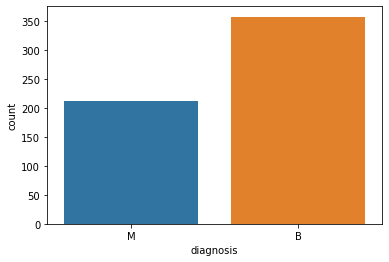

In [13]:
import seaborn as sns # Visualize the count
sns.countplot(big_data['diagnosis'],label='count')
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
big_data.iloc[:,1] = labelencoder_Y.fit_transform(big_data.iloc[:,1].values)



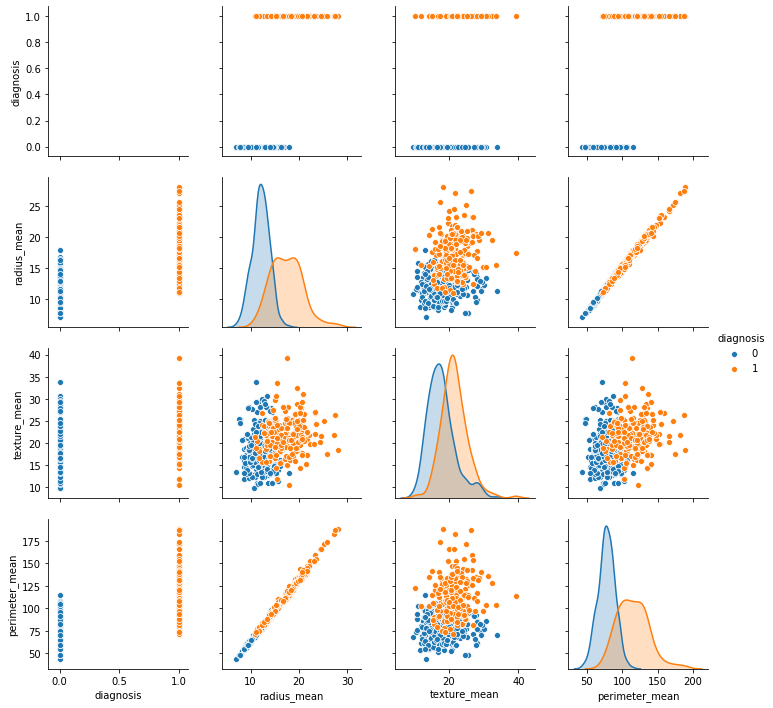

In [15]:
sns.pairplot(big_data.iloc[:,1:5],hue="diagnosis")
plt.show()

In [16]:
big_data.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


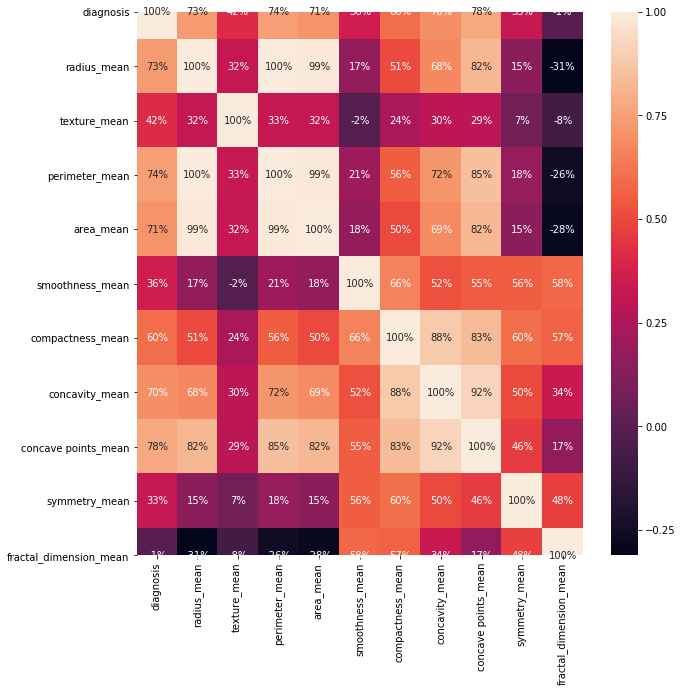

In [18]:
plt.figure(figsize=(10,10)) # to expand each cell
sns.heatmap(big_data.iloc[:,1:12].corr(),annot=True,fmt=".0%")
plt.show()

In [19]:
X = big_data.iloc[:,2:31].values # values is used to convert then into an array
Y = big_data.iloc[:,1].values  # Predicting array (Diagnosis)

print(type(X))
print(Y.shape)
X

<class 'numpy.ndarray'>
(569,)


array([[ 17.99  ,  10.38  , 122.8   , ...,   0.7119,   0.2654,   0.4601],
       [ 20.57  ,  17.77  , 132.9   , ...,   0.2416,   0.186 ,   0.275 ],
       [ 19.69  ,  21.25  , 130.    , ...,   0.4504,   0.243 ,   0.3613],
       ...,
       [ 16.6   ,  28.08  , 108.3   , ...,   0.3403,   0.1418,   0.2218],
       [ 20.6   ,  29.33  , 140.1   , ...,   0.9387,   0.265 ,   0.4087],
       [  7.76  ,  24.54  ,  47.92  , ...,   0.    ,   0.    ,   0.2871]])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 0)
X_test

array([[1.340e+01, 2.052e+01, 8.864e+01, ..., 5.106e-01, 2.051e-01,
        3.585e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, ..., 1.390e-01, 6.005e-02,
        2.444e-01],
       [1.402e+01, 1.566e+01, 8.959e+01, ..., 6.260e-02, 8.216e-02,
        2.136e-01],
       ...,
       [1.234e+01, 1.227e+01, 7.894e+01, ..., 1.791e-01, 1.070e-01,
        3.110e-01],
       [1.353e+01, 1.094e+01, 8.791e+01, ..., 8.539e-02, 7.407e-02,
        2.710e-01],
       [1.959e+01, 1.815e+01, 1.307e+02, ..., 6.810e-01, 2.247e-01,
        3.643e-01]])

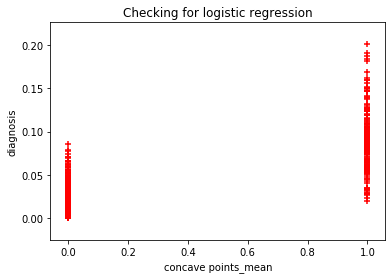

In [22]:

plt.title("Checking for logistic regression")
plt.xlabel("concave points_mean")
plt.ylabel("diagnosis")
plt.scatter(big_data['diagnosis'],big_data['concave points_mean'],marker='+',color="red")
plt.show()